# Disease Prediction using Machine Learning

This project focuses on predicting whether a tumor is **Benign** or **Malignant**
using medical diagnostic data.

The project demonstrates how machine learning techniques can assist
in early disease detection and support medical decision-making systems.


## Import Required Libraries

In this step, we import all the necessary Python libraries for data handling,
visualization, model training, and evaluation.


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix


## Load Medical Dataset

The Breast Cancer dataset is loaded from Scikit-learn.
It contains medical features extracted from tumor images
and a target label indicating whether the tumor is benign or malignant.


In [2]:
data = load_breast_cancer()

X = pd.DataFrame(data.data, columns=data.feature_names)
y = pd.Series(data.target)


## Dataset Exploration

We explore the dataset to understand its structure,
check feature names, and verify if there are any missing values.


In [3]:
X.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [4]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 30 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   mean radius              569 non-null    float64
 1   mean texture             569 non-null    float64
 2   mean perimeter           569 non-null    float64
 3   mean area                569 non-null    float64
 4   mean smoothness          569 non-null    float64
 5   mean compactness         569 non-null    float64
 6   mean concavity           569 non-null    float64
 7   mean concave points      569 non-null    float64
 8   mean symmetry            569 non-null    float64
 9   mean fractal dimension   569 non-null    float64
 10  radius error             569 non-null    float64
 11  texture error            569 non-null    float64
 12  perimeter error          569 non-null    float64
 13  area error               569 non-null    float64
 14  smoothness error         5

In [5]:
X.isnull().sum()

,0
mean radius,0
mean texture,0
mean perimeter,0
mean area,0
mean smoothness,0
mean compactness,0
mean concavity,0
mean concave points,0
mean symmetry,0
mean fractal dimension,0


## Split Dataset into Training and Testing Sets

The dataset is divided into training and testing sets
to evaluate model performance on unseen data.


In [6]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

## Feature Scaling

Standardization is applied to ensure all features
have the same scale, which improves model performance.


In [7]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

## Logistic Regression Model

Logistic Regression is a baseline classification model
used for binary disease prediction.


In [8]:
lr = LogisticRegression()
lr.fit(X_train, y_train)

lr_pred = lr.predict(X_test)
print("Logistic Regression Accuracy:", accuracy_score(y_test, lr_pred))


Logistic Regression Accuracy: 0.9736842105263158


## Support Vector Machine (SVM)

SVM is a powerful classification algorithm that works
well with high-dimensional medical data.


In [9]:
svm = SVC()
svm.fit(X_train, y_train)

svm_pred = svm.predict(X_test)
print("SVM Accuracy:", accuracy_score(y_test, svm_pred))


SVM Accuracy: 0.9824561403508771


## Random Forest Classifier

Random Forest is an ensemble learning method that combines
multiple decision trees and usually provides high accuracy.


In [10]:
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)

rf_pred = rf.predict(X_test)
print("Random Forest Accuracy:", accuracy_score(y_test, rf_pred))


Random Forest Accuracy: 0.9649122807017544


## Confusion Matrix

The confusion matrix visualizes the performance of the model
by showing correct and incorrect predictions.


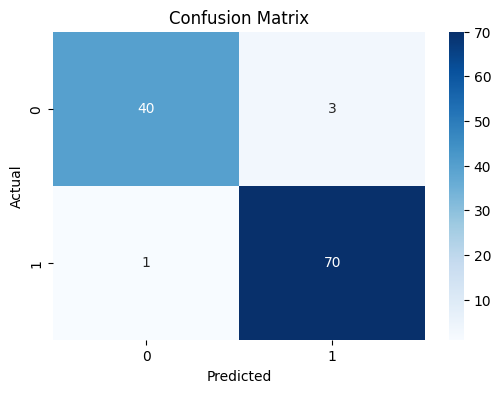

In [11]:
cm = confusion_matrix(y_test, rf_pred)

plt.figure(figsize=(6,4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()


## Classification Report

This report provides detailed evaluation metrics such as
precision, recall, and F1-score.


In [12]:
print(classification_report(y_test, rf_pred))

              precision    recall  f1-score   support

           0       0.98      0.93      0.95        43
           1       0.96      0.99      0.97        71

    accuracy                           0.96       114
   macro avg       0.97      0.96      0.96       114
weighted avg       0.97      0.96      0.96       114



## Save the Trained Model

The trained Random Forest model is saved using Joblib
so it can be reused later without retraining.


In [13]:
import joblib

# Save the trained Random Forest model
joblib.dump(rf, "disease_prediction_model.joblib")

print("Model saved successfully using Joblib!")


Model saved successfully using Joblib!


##  Project Summary & Conclusion

In this project, a Disease Prediction system was developed using
machine learning techniques on medical diagnostic data.

Three models were implemented:
- Logistic Regression
- Support Vector Machine (SVM)
- Random Forest Classifier

Among these, **Random Forest** achieved the best performance,
making it the most suitable model for disease prediction.

This project highlights the importance of machine learning in
healthcare applications and demonstrates how data-driven models
can support early diagnosis and decision-making.

✔ Task-4 successfully completed as part of the CodeAlpha Internship.
